<a href="https://colab.research.google.com/github/Nekokan1500/Machine-Learning/blob/main/DecisionTrees/Example_Decision_Trees_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# The code in this notebook is reproduced from 
# Hands-On Machine Learning with scikit-learn and Scientific Python Toolkits 2020
# by Amr T.

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df['target_name'] = df['target'].apply(lambda t: iris.target_names[t])

df_train,df_test = train_test_split(df,test_size=0.3)

x_train = df_train[iris.feature_names]
x_test = df_test[iris.feature_names]

y_train = df_train['target']
y_test = df_test['target']

clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
print("Tree depth: ",clf.get_depth())

y_test_pred = clf.predict(x_test)

accuracy_score(y_test, y_test_pred)


result = pd.DataFrame({
        'feature_name': iris.feature_names,
        'feature_importance': clf.feature_importances_
}).sort_values('feature_importance',
                 ascending=False
).set_index('feature_name')

print(result)

print(export_text(clf, feature_names=iris.feature_names, spacing=3, decimals=1))

Tree depth:  6
                   feature_importance
feature_name                         
petal width (cm)             0.529368
petal length (cm)            0.427350
sepal length (cm)            0.043281
sepal width (cm)             0.000000
|--- petal width (cm) <= 0.8
|   |--- class: 0
|--- petal width (cm) >  0.8
|   |--- petal length (cm) <= 4.9
|   |   |--- sepal length (cm) <= 5.0
|   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  5.0
|   |   |   |--- class: 1
|   |--- petal length (cm) >  4.9
|   |   |--- petal width (cm) <= 1.8
|   |   |   |--- petal length (cm) <= 5.3
|   |   |   |   |--- sepal length (cm) <= 6.5
|   |   |   |   |   |--- petal width (cm) <= 1.6
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- petal width (cm) >  1.6
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  6.5
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  5.3
|   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1

Average Score: 0.951 [5th percentile: 0.911 & 95th percentile: 1.0]


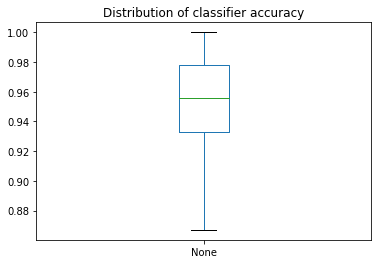

In [10]:
# Repeated sub-sampling validation/Monte-Carlo cross-validation
accuracy_scores = []
for _ in range(100):
  df_train,df_test = train_test_split(df,test_size=0.3)
  x_train = df_train[iris.feature_names]
  x_test = df_test[iris.feature_names]
  y_train = df_train['target']
  y_test = df_test['target']
  clf = DecisionTreeClassifier()
  clf.fit(x_train,y_train)
  y_test_pred = clf.predict(x_test)
  accuracy_scores.append(round(accuracy_score(y_test,y_test_pred),3))

accuracy_scores = pd.Series(accuracy_scores)
accuracy_scores.plot(title='Distribution of classifier accuracy', kind='box')
print('Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}]'.format(
  accuracy_scores.mean(),
  accuracy_scores.quantile(.05),
  accuracy_scores.quantile(.95),
  )
)

Average Score: 0.949 [5th percentile: 0.911 & 95th percentile: 1.0]


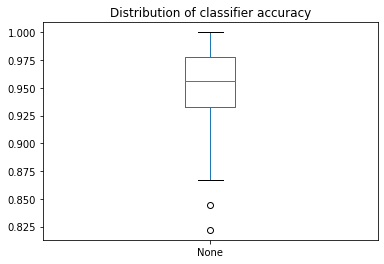

In [15]:
# Use scikit-learn's ShuffleSplit to randomly split the dataset into 100 training
# and test pairs
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

accuracy_scores = []

# create a shuffle split instance
rs = ShuffleSplit(n_splits=100,test_size=0.3)
# Get 100 pairs of indices
for train_index, test_index in rs.split(df):
  x_train = df.loc[train_index, iris.feature_names]
  x_test = df.loc[test_index, iris.feature_names]
  y_train = df.loc[train_index, 'target']
  y_test = df.loc[test_index, 'target']
  clf = DecisionTreeClassifier()
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  accuracy_scores.append(round(accuracy_score(y_test,y_pred),3))

accuracy_scores = pd.Series(accuracy_scores)
accuracy_scores.plot(title='Distribution of classifier accuracy', kind='box')
print('Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}]'.format(
  accuracy_scores.mean(),
  accuracy_scores.quantile(.05),
  accuracy_scores.quantile(.95),
  )
)

Average Score: 0.942 [5th percentile: 0.889 & 95th percentile: 0.978]


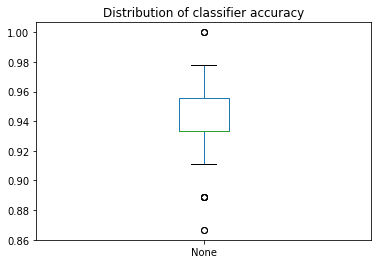

In [16]:
# Use scikit-learn's cross_validate function
# recommended when dealing with a small dataset
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier()
rs = ShuffleSplit(n_splits=100,test_size=0.3)

x = df[iris.feature_names]
y = df['target']

cv_results = cross_validate(clf, x, y, cv=rs, scoring='accuracy')

accuracy_scores = pd.Series(cv_results['test_score'])

accuracy_scores.plot(title='Distribution of classifier accuracy', kind='box')
print('Average Score: {:.3} [5th percentile: {:.3} & 95th percentile: {:.3}]'.format(
  accuracy_scores.mean(),
  accuracy_scores.quantile(.05),
  accuracy_scores.quantile(.95),
  )
)

In [20]:
# Trying different tree depth values (Maximum is 4 unconstrained)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.model_selection import cross_validate

df_train,df_test = train_test_split(df, test_size=0.25)
x_train = df_train[iris.feature_names]
x_test = df_test[iris.feature_names]
y_train = df_train['target']
y_test = df_test['target']

for max_depth in [1,2,3,4]:
  clf = DecisionTreeClassifier(max_depth=max_depth)
  rs = ShuffleSplit(n_splits=20, test_size=0.25)
  cv_results = cross_validate(clf, x_train, y_train, cv=rs, scoring='accuracy')
  accuracy_scores = pd.Series(cv_results['test_score'])
  print('@ max_depth = {}: accuracy_scores: {}~{}'.format(max_depth,
    accuracy_scores.quantile(.1).round(3),
    accuracy_scores.quantile(.9).round(3)
  )
)

@ max_depth = 1: accuracy_scores: 0.532~0.75
@ max_depth = 2: accuracy_scores: 0.886~0.964
@ max_depth = 3: accuracy_scores: 0.893~1.0
@ max_depth = 4: accuracy_scores: 0.857~0.964


In [27]:
# Based on the analysis above, the user can train a model once more using the 
# entire training set and a max_depth of, say, 3. Thhen, use the trained model
# to predict the classes for the best set in order to evaluate the final model
df_train,df_test = train_test_split(df, test_size=0.3)
x_train = df_train[iris.feature_names]
x_test = df_test[iris.feature_names]
y_train = df_train['target']
y_test = df_test['target']

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("Accuracy score: ", round(accuracy_score(y_test, y_pred),3))
print(export_text(clf, feature_names=iris.feature_names, spacing=3, decimals=1))

Accuracy score:  0.933
|--- petal width (cm) <= 0.8
|   |--- class: 0
|--- petal width (cm) >  0.8
|   |--- petal width (cm) <= 1.7
|   |   |--- petal length (cm) <= 5.0
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  5.0
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.7
|   |   |--- class: 2



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


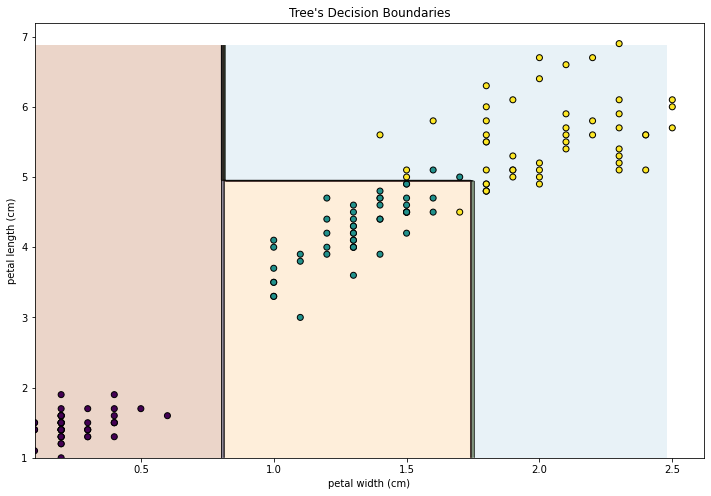

In [5]:
# Draw the decision boundaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_decision_boundary(clf, x, y):
  feature_names = x.columns
  x, y = x.values, y.values
  x_min, x_max = x[:,0].min(), x[:,0].max()
  y_min, y_max = x[:,1].min(), x[:,1].max()
  step = 0.02
  xx, yy = np.meshgrid(
  np.arange(x_min, x_max, step),
  np.arange(y_min, y_max, step)
  )
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.figure(figsize=(12,8))
  plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
  plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
  plt.scatter(x[:,0], x[:,1], c=y, edgecolors='k')
  plt.title("Tree's Decision Boundaries")
  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])

x = df[['petal width (cm)', 'petal length (cm)']]
y = df['target']
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x, y)
plot_decision_boundary(clf, x, y)

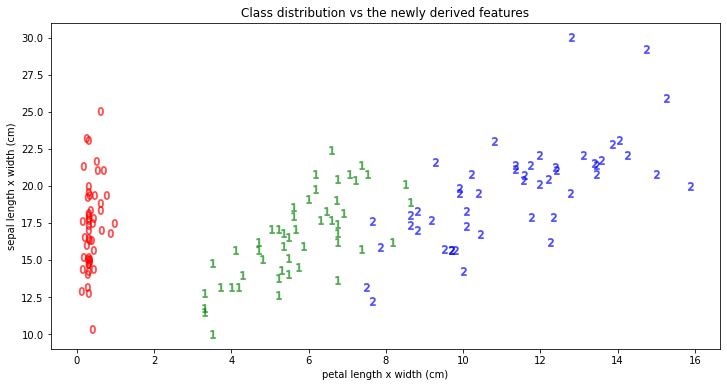

In [14]:
# Feature engineering
import matplotlib.pyplot as plt

df['petal length x width (cm)'] = df['petal length (cm)']*df['petal width (cm)']
df['sepal length x width (cm)'] = df['sepal length (cm)']*df['sepal width (cm)']

fig, ax = plt.subplots(figsize=(12,6))
h_label = 'petal length x width (cm)'
v_label = 'sepal length x width (cm)'

for c in df['target'].value_counts().index.tolist():
  df[df['target'] == c].plot(
      title='Class distribution vs the newly derived features',
      kind = 'scatter',
      x=h_label,
      y=v_label,
      color=['r','g','b'][c], # each class has a different color
      marker=f'${c}$', # use class id as marker
      s=64,
      alpha=0.5,
      ax=ax
  )

fig.show()


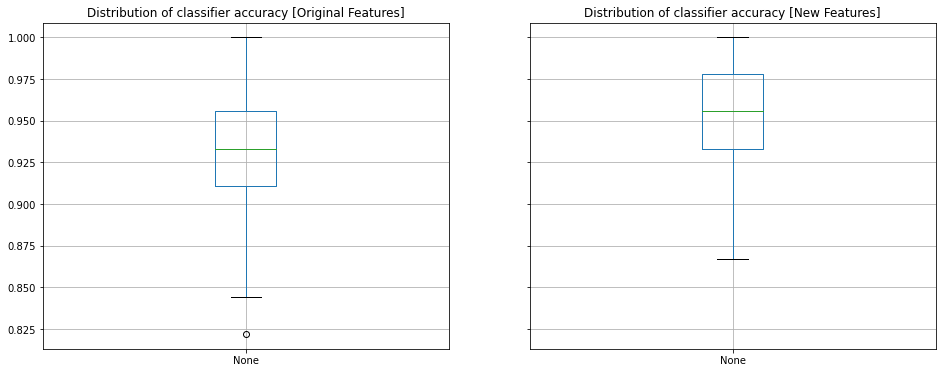

In [16]:
# Comparing model with original and derived features
features_orig = iris.feature_names
features_new = ['petal length x width (cm)', 'sepal length x width (cm)']

accuracy_scores_orig = []
accuracy_scores_new = []

for _ in range(500):
  df_train, df_test = train_test_split(df, test_size=0.3)
  x_train_orig = df_train[features_orig]
  x_train_new = df_train[features_new]
  x_test_orig = df_test[features_orig]
  x_test_new = df_test[features_new]
  y_train = df_train['target']
  y_test = df_test['target']
  clf_orig = DecisionTreeClassifier(max_depth=2)
  clf_new = DecisionTreeClassifier(max_depth=2)
  clf_orig.fit(x_train_orig, y_train)
  clf_new.fit(x_train_new, y_train)
  y_pred_orig = clf_orig.predict(x_test_orig)
  y_pred_new = clf_new.predict(x_test_new)
  accuracy_scores_orig.append(round(accuracy_score(y_test,y_pred_orig),3))
  accuracy_scores_new.append(round(accuracy_score(y_test,y_pred_new),3))

accuracy_scores_orig = pd.Series(accuracy_scores_orig)
accuracy_scores_new = pd.Series(accuracy_scores_new)

fig, axs = plt.subplots(1,2,figsize=(16,6),sharey=True)

accuracy_scores_orig.plot(
    title='Distribution of classifier accuracy [Original Features]',
    kind='box',
    grid=True,
    ax=axs[0]
)

accuracy_scores_new.plot(
    title='Distribution of classifier accuracy [New Features]',
    kind='box',
    grid=True,
    ax=axs[1]
)

fig.show()


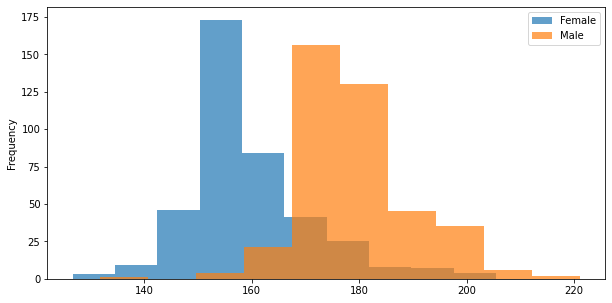

In [9]:
# Decision Tree Regressor Example
import numpy as np

# take 200 random samples from two populations:
n = 200

# pop 1: females with mean height of 155cm and std.dev of 4
#        males with mean height of 175cm and std.dev of 5
# pop 2: females with mean height of 165cm and std.dev of 15
#        males with mean height of 185cm and std.dev of 12

height_pop1_f = np.random.normal(loc=155, scale=4, size=n)
height_pop1_m = np.random.normal(loc=175, scale=5, size=n)
height_pop2_f = np.random.normal(loc=165, scale=15, size=n)
height_pop2_m = np.random.normal(loc=185, scale=12, size=n)

# group all the males and all the females together
height_f = np.concatenate([height_pop1_f,height_pop2_f])
height_m = np.concatenate([height_pop1_m,height_pop2_m])

# put data in a pandas DataFrame
df_height = pd.DataFrame({
    'Gender': [1 for i in range(height_f.size)]+[2 for i in range(height_m.size)],
    'Height': np.concatenate((height_f, height_m))
})

# plot the fictional data
fig, ax = plt.subplots(figsize=(10,5))
df_height[df_height['Gender'] == 1]['Height'].plot(
    label='Female', kind='hist', bins=10, alpha=0.7, ax=ax
)
df_height[df_height['Gender'] == 2]['Height'].plot(
    label='Male', kind='hist', bins=10, alpha=0.7, ax=ax
)
ax.legend()
fig.show()

In [19]:
# summary statistics
df_height.groupby('Gender')[['Height']].agg([np.mean,np.median]).round(1)


Height       
         mean median
Gender              
1       159.4  156.8
2       180.2  178.9

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_train, df_test = train_test_split(df_height, test_size=0.3)
x_train, x_test = df_train[['Gender']], df_test[['Gender']]
y_train, y_test = df_train['Height'], df_test['Height']

for criterion in ['squared_error','absolute_error']:
  regsr = DecisionTreeRegressor(criterion=criterion)
  regsr.fit(x_train,y_train)
  print(f'criterion={criterion}:\n')
  print(export_text(regsr, feature_names=['Gender'], spacing=3, decimals=1))
  y_test_pred = regsr.predict(x_test)
  print(criterion,mean_squared_error(y_test, y_test_pred))
  print(criterion,mean_absolute_error(y_test, y_test_pred))

criterion=squared_error:

|--- Gender <= 1.5
|   |--- value: [160.3]
|--- Gender >  1.5
|   |--- value: [179.5]

squared_error 109.06603413335182
squared_error 7.948094822161713
criterion=absolute_error:

|--- Gender <= 1.5
|   |--- value: [157.7]
|--- Gender >  1.5
|   |--- value: [178.2]

absolute_error 114.00612040055817
absolute_error 7.7189215965077835


In [13]:
# Applying sample weights
regsr = DecisionTreeRegressor()
print("Emphasis on \"above 150\"")
sample_weights = y_train.apply(lambda y: 10 if y > 150 else 1)
regsr.fit(x_train,y_train,sample_weight=sample_weights)
print(export_text(regsr, feature_names=['Gender'], spacing=3, decimals=1))
print("Emphasis on \"below 150\"")
sample_weights = y_train.apply(lambda y: 10 if y<= 150 else 1)
regsr.fit(x_train,y_train,sample_weight=sample_weights)
print(export_text(regsr, feature_names=['Gender'], spacing=3, decimals=1))

Emphasis on "above 150"
|--- Gender <= 1.5
|   |--- value: [162.2]
|--- Gender >  1.5
|   |--- value: [179.7]

Emphasis on "below 150"
|--- Gender <= 1.5
|   |--- value: [151.8]
|--- Gender >  1.5
|   |--- value: [178.5]

